# From a Bayesian network to a Classifier

This notebook shows how to build a classifier from an Bayesian network (and not from a database).

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
import pyAgrum as gum
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb

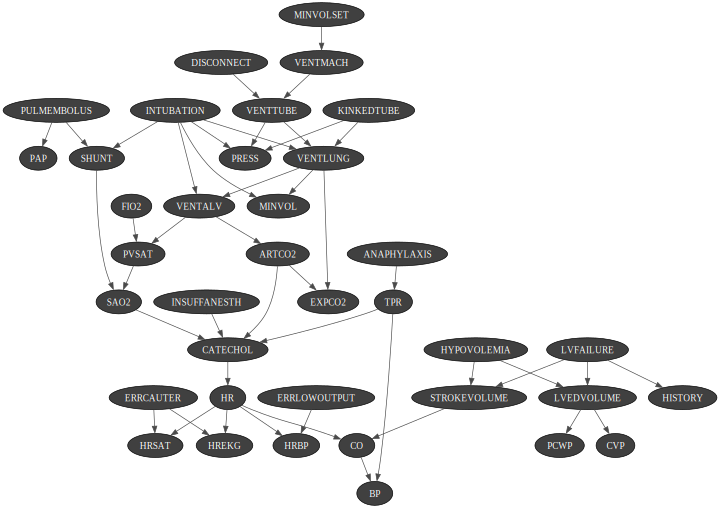

HR:Labelized({LOW|NORMAL|HIGH})


In [2]:
bn=gum.loadBN("res/alarm.dsl")
gnb.showBN(bn,size="10")
print(bn.variable("HR"))

Let's say that you would like to use this Bayesian network to learn a classifier for the class HR (3 classes)

In [3]:
#generating the base of 100 values for testing purpose
print(f"LL(alarm-100)={gum.generateSample(bn,100,'out/alarm-100.csv')}")

LL(alarm-100)=-1457.0959079702577


Binary classifier : False


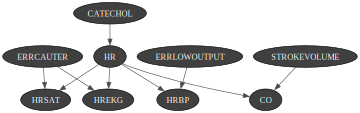

predicted : ['HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH']
in base   : ['HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH

In [4]:
bnc=skbn.BNClassifier()
bnc.fromTrainedModel(bn,targetAttribute="HR")
print(f"Binary classifier : {bnc.isBinaryClassifier}")
gnb.showBN(bnc.MarkovBlanket)

xTrain, yTrain = bnc.XYfromCSV(filename ='out/alarm-100.csv' )
print(f"predicted : {list(bnc.predict(xTrain))}")
print(f"in base   : {yTrain.to_list()}")

In [5]:
print(list(bnc.predict(X ='out/alarm-100.csv')))

['HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH']


In [6]:
scoreCSV1 = bnc.score('out/alarm-100.csv', y = yTrain)
print("{0:.2f}% good predictions".format(100*scoreCSV1))

100.00% good predictions


## From a Bayesian network to a Binary classifier

By targetting a specific label, one can create a binary classifier to predict this very target.

Binary classifier : True


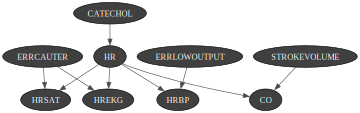

predicted : [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False]
in base   : [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

In [7]:
bnc=skbn.BNClassifier()
bnc.fromTrainedModel(bn,targetAttribute="HR",targetModality="LOW")
print(f"Binary classifier : {bnc.isBinaryClassifier}")
gnb.showBN(bnc.MarkovBlanket)

xTrain, yTrain = bnc.XYfromCSV(filename ='out/alarm-100.csv' )
print(f"predicted : {list(bnc.predict(xTrain))}")
print(f"in base   : {yTrain.to_list()}")

In [8]:
print(list(bnc.predict(X ='out/alarm-100.csv')))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False]


In [9]:
scoreCSV1 = bnc.score('out/alarm-100.csv', y = yTrain)
print("{0:.2f}% good predictions".format(100*scoreCSV1))

100.00% good predictions


LL(alarm-1000)=-14787.298744664655


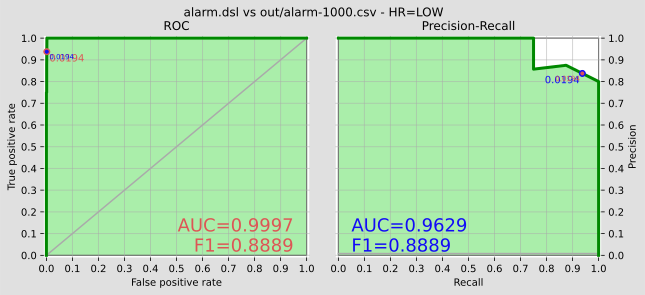

In [10]:
print(f"LL(alarm-1000)={gum.generateSample(bn,1000,'out/alarm-1000.csv',with_labels=True)}")
bnc.showROC_PR('out/alarm-1000.csv')

In [11]:
import pyAgrum.lib.bn2roc as bn2roc
bn2roc.animROC(bnc.bn,'out/alarm-1000.csv',target="HR",label="LOW")

out/alarm-1000.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|


interactive(children=(IntSlider(value=50, description='rate'), Output(layout=Layout(height='250px'))), _dom_cl…

In [12]:
bn2roc.animPR(bnc.bn,'out/alarm-1000.csv',target="HR",label="LOW")

out/alarm-1000.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|


interactive(children=(IntSlider(value=50, description='rate'), Output(layout=Layout(height='250px'))), _dom_cl…